<a href="https://colab.research.google.com/github/aniketakumari/Zomato-Data-Analysis/blob/main/zomato_data_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

## **1**. **Converting the data type of the "rate" column to float**

## **2**. **Remove the denominator.**

In [7]:
def handleRate(value) :
  value = str(value).split("/")
  value = value[0]
  return float(value)

dataframe["rate"] = dataframe["rate"].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## **3**. **Summary of Dataframe.**

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## **Conclusion from the above dataframe info summary that there is no null values in the data frame.**

## **Queries and Exploratory Data Analysis on the modified dataframe.**

**Query 1**. Type of restaurant majority of customers order food from.

Text(0.5, 0, 'Type of Restaurant')

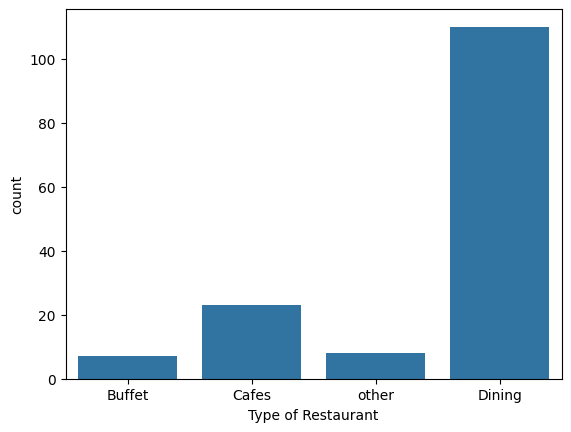

In [9]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("Type of Restaurant")

**Conclusion** : Most orders from Dining Category.

**Query 2**. Votes each type of restaurant from the customers.

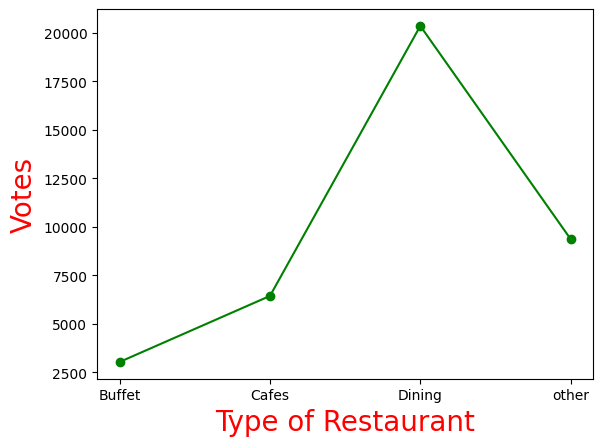

In [11]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes" : grouped_data})

plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show()

**Conclusion** : Highest voting to Dining category restaurants.

**Query 3**. The rating of the majority of the restaurants has been received.

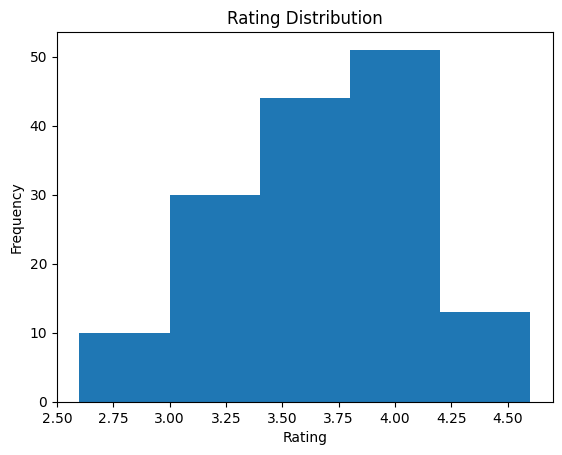

In [12]:
plt.hist(dataframe["rate"], bins=5)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

**Conclusion** : The majority of restaurants received ratings in the range of 4 to 4.25.

**Query 4**. The average spending of the couples on each other who order food online for their partner.

Text(0.5, 0, 'Average Spending By The Couples')

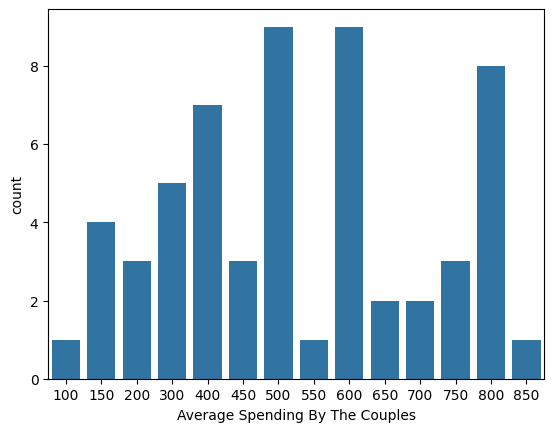

In [14]:
couple_data = dataframe["approx_cost(for two people)"][dataframe["online_order"] == "Yes"]
sns.countplot(x=couple_data)
plt.xlabel("Average Spending By The Couples")

**Conclusion** : Couples are spending from range 500 to 600 rupees on their partner on online food ordering.

**Query 5**. Which mode [Offline or Online] received the maximum rating.

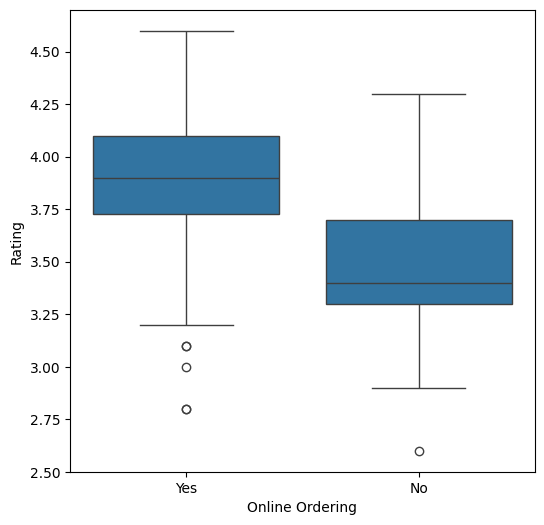

In [17]:
plt.figure(figsize=(6, 6))
sns.boxplot(y="rate", x="online_order", data=dataframe)
plt.ylabel("Rating")
plt.xlabel("Online Ordering")
plt.show()

**Conclusion** : Offline food ordering has received lower rating as compared to online which has received excellent rating.

**Query 6**. Which type of restaurant received the most no. of offline orders, so that zomato can provide those customers with good offers.

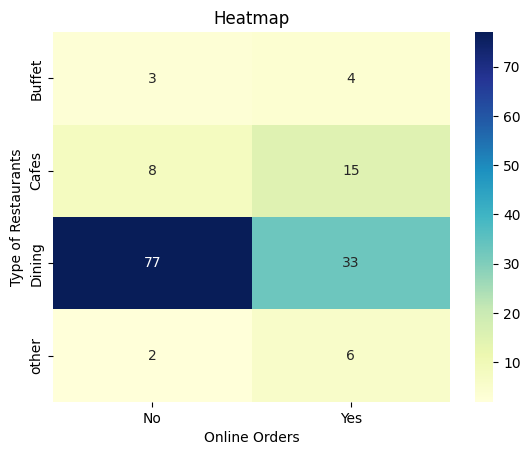

In [22]:
pivot_table = dataframe.pivot_table(index="listed_in(type)", columns="online_order", values="name", aggfunc="count")
#pivot_table.plot(kind="bar", stacked=True)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Orders")
plt.ylabel("Type of Restaurants")
plt.show()

**Conclusion** : We concluded that dining restaurant accept offline orders whereas cafes primarily received online orders.